In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
list_of_orders = pd.read_excel(r"C:\Users\Soft\Desktop\Py\Docs\AmazingMart.xlsx", sheet_name="ListOfOrders")
orders_breakdown = pd.read_excel(r"C:\Users\Soft\Desktop\Py\Docs\AmazingMart.xlsx", sheet_name="OrderBreakdown")

In [3]:
list_of_orders.head(3)

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,lon,lat
0,BN-2011-7407039,2011-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2011-01-05,Economy Plus,Stockholm,18.068581,59.329324
1,AZ-2011-9050313,2011-01-03,Summer Hayward,Southport,United Kingdom,North,Consumer,2011-01-07,Economy,England,-3.010113,53.645708
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,Valence,France,Central,Consumer,2011-01-08,Economy,Auvergne-Rhône-Alpes,4.892360,44.933393


In [4]:
orders_breakdown.head(3)

,Order ID,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper
1,AZ-2011-9050313,"Dania Corner Shelving, Traditional",0.0,854,290,7,Furniture,Bookcases
2,AZ-2011-6674300,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,Office Supplies,Art


In [5]:
df = pd.merge(list_of_orders, orders_breakdown)

In [6]:
df.head(3)

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,lon,lat,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,2011-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2011-01-05,Economy Plus,Stockholm,18.068581,59.329324,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper
1,AZ-2011-9050313,2011-01-03,Summer Hayward,Southport,United Kingdom,North,Consumer,2011-01-07,Economy,England,-3.010113,53.645708,"Dania Corner Shelving, Traditional",0.0,854,290,7,Furniture,Bookcases
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,Valence,France,Central,Consumer,2011-01-08,Economy,Auvergne-Rhône-Alpes,4.892360,44.933393,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,Office Supplies,Art


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       8047 non-null   object        
 1   Order Date     8047 non-null   datetime64[ns]
 2   Customer Name  8047 non-null   object        
 3   City           8047 non-null   object        
 4   Country        8047 non-null   object        
 5   Region         8047 non-null   object        
 6   Segment        8047 non-null   object        
 7   Ship Date      8047 non-null   datetime64[ns]
 8   Ship Mode      8047 non-null   object        
 9   State          8047 non-null   object        
 10  lon            8047 non-null   float64       
 11  lat            8047 non-null   float64       
 12  Product Name   8047 non-null   object        
 13  Discount       8047 non-null   float64       
 14  Sales          8047 non-null   int64         
 15  Profit         8047 n

In [8]:
df.isna().sum()

Order ID         0
Order Date       0
Customer Name    0
City             0
Country          0
Region           0
Segment          0
Ship Date        0
Ship Mode        0
State            0
lon              0
lat              0
Product Name     0
Discount         0
Sales            0
Profit           0
Quantity         0
Category         0
Sub-Category     0
dtype: int64

In [9]:
df.duplicated().sum()

2

In [10]:
df.drop_duplicates(inplace=True)

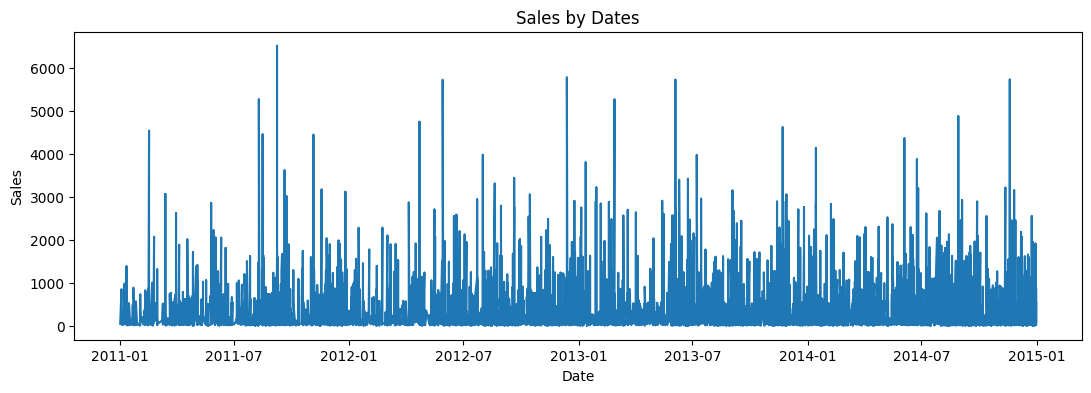

In [11]:
plt.figure(figsize=(13, 4))
plt.plot(df["Order Date"], df["Sales"])
plt.title("Sales by Dates")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [12]:
df["Year-Month"] = df["Order Date"].dt.to_period("M")

In [13]:
df["Year-Month"].head()

0    2011-01
1    2011-01
2    2011-01
3    2011-01
4    2011-01
Name: Year-Month, dtype: period[M]

In [14]:
monthly_sales = df.groupby("Year-Month")["Sales"].sum().reset_index()
monthly_sales

,Year-Month,Sales
0,2011-01,14335
1,2011-02,21646
2,2011-03,20567
3,2011-04,21920
4,2011-05,28955
5,2011-06,48837
6,2011-07,16635
7,2011-08,47822
8,2011-09,62455
9,2011-10,15670


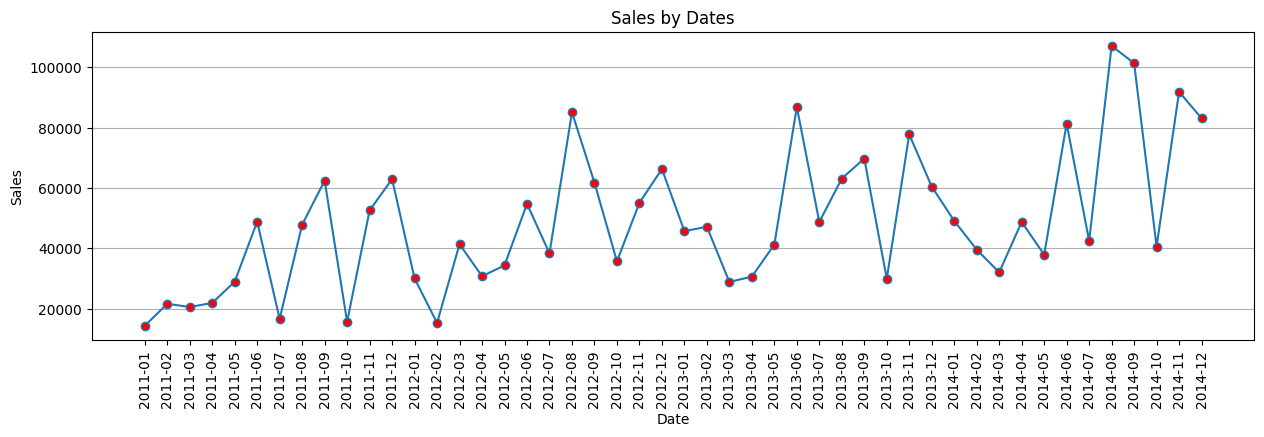

In [15]:
plt.figure(figsize=(15, 4))
plt.plot(monthly_sales["Year-Month"].astype(str), monthly_sales["Sales"], 
        marker="o", markerfacecolor="red")
plt.title("Sales by Dates")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(axis="y")
plt.xticks(rotation=90)
plt.show()

In [16]:
monthly_profit = df.groupby("Year-Month")["Profit"].sum().reset_index()
monthly_profit

,Year-Month,Profit
0,2011-01,249
1,2011-02,800
2,2011-03,4042
3,2011-04,3357
4,2011-05,1589
5,2011-06,5945
6,2011-07,2060
7,2011-08,6172
8,2011-09,11926
9,2011-10,1918


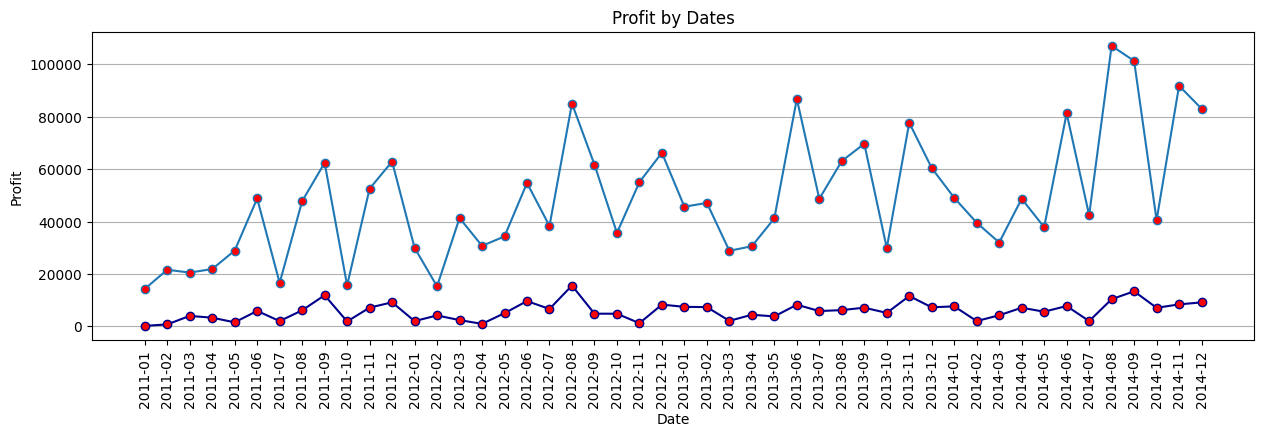

In [17]:
plt.figure(figsize=(15, 4))
plt.plot(monthly_sales["Year-Month"].astype(str), monthly_sales["Sales"],
        marker="o", markerfacecolor="red")
plt.plot(monthly_profit["Year-Month"].astype(str), monthly_profit["Profit"], color="darkblue",
        marker="o", markerfacecolor="red")
plt.title("Profit by Dates")
plt.xlabel("Date")
plt.ylabel("Profit")
plt.grid(axis="y")
plt.xticks(rotation=90)
plt.show()

In [18]:
region_sales_profit = df.groupby("Region")[["Sales", "Profit"]].sum().reset_index()
region_sales_profit

,Region,Sales,Profit
0,Central,1315216,157626
1,North,515979,71439
2,South,517166,54137


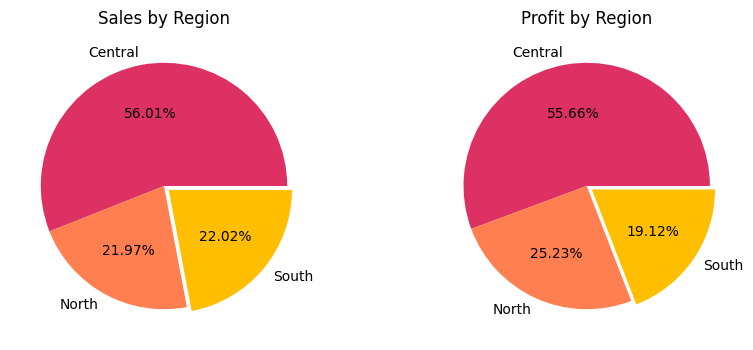

In [19]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Sales by Region")
plt.pie(region_sales_profit["Sales"], labels=region_sales_profit["Region"], 
        autopct="%.2f%%", explode=[0, 0, 0.05], colors=["#DE3163", "#FF7F50", "#FFBF00"])

plt.subplot(1, 2, 2)
plt.title("Profit by Region")
plt.pie(region_sales_profit["Profit"], labels=region_sales_profit["Region"], 
        autopct="%.2f%%", explode=[0, 0, 0.05], colors=["#DE3163", "#FF7F50", "#FFBF00"])

plt.show()

In [20]:
subcategory_sales_profit = df.groupby("Sub-Category")[["Sales", "Profit"]].sum().reset_index()
subcategory_sales_profit

,Sub-Category,Sales,Profit
0,Accessories,131309,26830
1,Appliances,209900,37906
2,Art,127147,23481
3,Binders,78850,14675
4,Bookcases,294396,43655
5,Chairs,186698,15489
6,Copiers,290081,42775
7,Envelopes,31210,6463
8,Fasteners,16238,3420
9,Furnishings,68237,11321


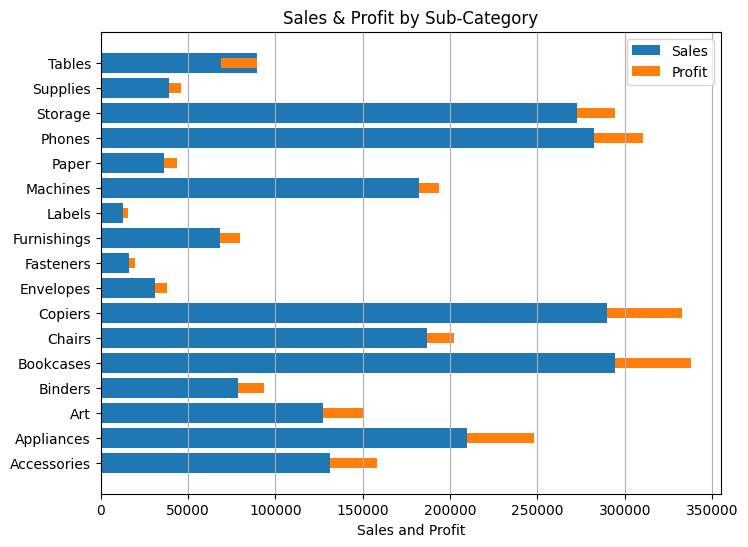

In [21]:
plt.figure(figsize=(8, 6))
plt.barh(subcategory_sales_profit["Sub-Category"], subcategory_sales_profit["Sales"], label="Sales") 
plt.barh(subcategory_sales_profit["Sub-Category"], subcategory_sales_profit["Profit"], label="Profit",
        left=subcategory_sales_profit["Sales"], height=0.4)
plt.title("Sales & Profit by Sub-Category")
plt.xlabel("Sales and Profit")
plt.legend()
plt.grid(axis="x")
plt.show()

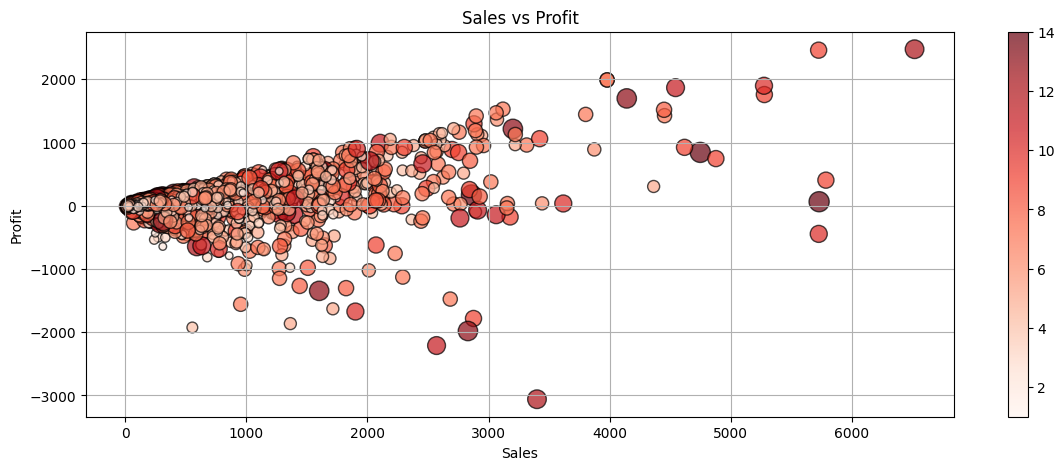

In [22]:
plt.figure(figsize=(14, 5))
plt.scatter(df["Sales"], df["Profit"], alpha=0.7, edgecolors="black", 
            c=df["Quantity"], s=df["Quantity"]*15, cmap="Reds")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Sales vs Profit")
plt.colorbar()
plt.grid()
plt.show()

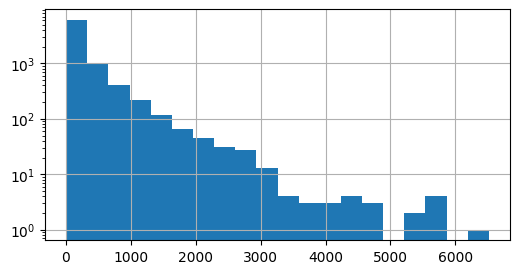

In [59]:
plt.figure(figsize=(6, 3))
plt.hist(df["Sales"], bins=20, log=True)
plt.grid()
plt.show()

In [58]:
df[df["Sales"]<=1000]

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,lon,lat,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category,Year-Month
0,BN-2011-7407039,2011-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2011-01-05,Economy Plus,Stockholm,18.068581,59.329324,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper,2011-01
1,AZ-2011-9050313,2011-01-03,Summer Hayward,Southport,United Kingdom,North,Consumer,2011-01-07,Economy,England,-3.010113,53.645708,"Dania Corner Shelving, Traditional",0.0,854,290,7,Furniture,Bookcases,2011-01
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,Valence,France,Central,Consumer,2011-01-08,Economy,Auvergne-Rhône-Alpes,4.892360,44.933393,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,Office Supplies,Art,2011-01
3,BN-2011-2819714,2011-01-04,Mary Parker,Birmingham,United Kingdom,North,Corporate,2011-01-09,Economy,England,-1.890401,52.486243,"Boston Markers, Easy-Erase",0.5,27,-22,2,Office Supplies,Art,2011-01
4,BN-2011-2819714,2011-01-04,Mary Parker,Birmingham,United Kingdom,North,Corporate,2011-01-09,Economy,England,-1.890401,52.486243,"Eldon Folders, Single Width",0.5,17,-1,2,Office Supplies,Storage,2011-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8042,AZ-2014-1412225,2014-12-31,Leon Barnes,Worcester,United Kingdom,North,Consumer,2015-01-01,Priority,England,-2.221575,52.193636,"Fellowes Shelving, Single Width",0.0,289,75,5,Office Supplies,Storage,2014-12
8043,AZ-2014-7604524,2014-12-31,Rebecca Chamberlain,Hamburg,Germany,Central,Home Office,2015-01-04,Economy,Hamburg,9.993682,53.551085,"Wilson Jones Index Tab, Economy",0.0,32,8,5,Office Supplies,Binders,2014-12
8044,BN-2014-4140795,2014-12-31,Daniel Hamilton,Eindhoven,Netherlands,Central,Home Office,2015-01-05,Economy Plus,North Brabant,5.469722,51.441642,"BIC Pencil Sharpener, Fluorescent",0.5,30,-10,2,Office Supplies,Art,2014-12
8045,BN-2014-4140795,2014-12-31,Daniel Hamilton,Eindhoven,Netherlands,Central,Home Office,2015-01-05,Economy Plus,North Brabant,5.469722,51.441642,"Avery Binder Covers, Recycled",0.5,23,-6,4,Office Supplies,Binders,2014-12


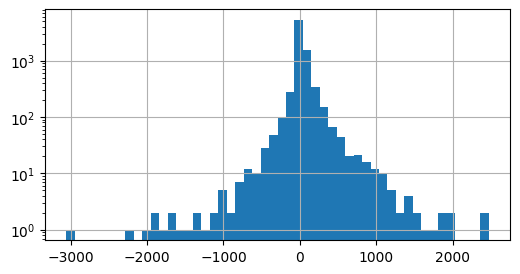

In [62]:
plt.figure(figsize=(6, 3))
plt.hist(df["Profit"], bins=50, log=True)
plt.grid()
plt.show()

In [66]:
df[df["Profit"]>=2000]

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,lon,lat,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category,Year-Month
868,AZ-2011-5313166,2011-09-08,Alexander Bond,Lugo,Spain,South,Corporate,2011-09-11,Economy Plus,Galicia,-7.556758,43.009738,"Hamilton Beach Stove, Silver",0.0,6517,2476,12,Office Supplies,Appliances,2011-09
1970,AZ-2012-5752966,2012-05-29,Harrison Cooke,Luton,United Kingdom,North,Consumer,2012-05-29,Immediate,England,-0.420025,51.878671,"Nokia Smart Phone, Full Size",0.0,5725,2461,9,Technology,Phones,2012-05


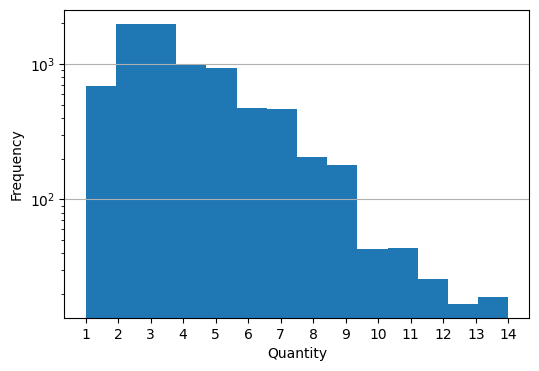

In [72]:
plt.figure(figsize=(6, 4))
plt.hist(df["Quantity"], bins=14, log=True)
plt.xticks(range(1, 15))
plt.grid(axis="y")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

In [70]:
df[df["Quantity"]<2]

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,lon,lat,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category,Year-Month
7,AZ-2011-2918397,2011-01-07,Fredrick Beveridge,La Seyne-sur-Mer,France,Central,Corporate,2011-01-08,Priority,Provence-Alpes-Côte d'Azur,5.878219,43.102976,"Bush Floating Shelf Set, Pine",0.10,155,36,1,Furniture,Bookcases,2011-01
13,AZ-2011-4827146,2011-01-11,Faith Greenwood,Vienna,Austria,Central,Consumer,2011-01-15,Economy,Vienna,16.373819,48.208174,"Boston Canvas, Fluorescent",0.00,55,10,1,Office Supplies,Art,2011-01
33,AZ-2011-7675351,2011-01-15,Everett Dunbar,Langen,Germany,Central,Corporate,2011-01-20,Economy Plus,Lower Saxony,8.663401,49.991466,"Cuisinart Microwave, White",0.10,249,3,1,Office Supplies,Appliances,2011-01
40,AZ-2011-1816950,2011-01-18,John Baca,Esbjerg,Denmark,North,Consumer,2011-01-23,Economy Plus,South Denmark,8.459405,55.476466,"Acco Binding Machine, Economy",0.50,26,-11,1,Office Supplies,Binders,2011-01
49,AZ-2011-8034411,2011-01-22,Melissa Bean,Prato,Italy,South,Home Office,2011-01-26,Economy,Tuscany,11.102228,43.877705,"Boston Canvas, Easy-Erase",0.00,54,12,1,Office Supplies,Art,2011-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,AZ-2014-494283,2014-12-27,Sherron Henegar,Harrow,United Kingdom,North,Consumer,2015-01-02,Economy,England,-0.341995,51.580559,"GlobeWeis Peel and Seal, with clear poly window",0.00,25,1,1,Office Supplies,Envelopes,2014-12
8011,AZ-2014-5388375,2014-12-29,Anna Kelly,Pamplona,Spain,South,Corporate,2015-01-02,Economy,Navarra,-1.645774,42.812526,"Fellowes Shelving, Industrial",0.10,52,20,1,Office Supplies,Storage,2014-12
8022,AZ-2014-8026360,2014-12-29,Darcy Farnell,Sarcelles,France,Central,Consumer,2015-01-03,Economy,Ile-de-France,2.378493,48.997347,"Panasonic Card Printer, Durable",0.15,148,9,1,Technology,Machines,2014-12
8025,BN-2014-4912801,2014-12-29,Rachel Morton,Stockholm,Sweden,North,Corporate,2015-01-01,Priority,Stockholm,18.068581,59.329324,"Sanford Highlighters, Blue",0.50,8,-6,1,Office Supplies,Art,2014-12


In [75]:
ind_score = pd.Series(np.random.randint(3, 22, 20))
aus_score = pd.Series(np.random.randint(1, 21, 20))
ind_score, aus_score

(0     17
 1      4
 2     17
 3      3
 4     14
 5     15
 6      6
 7     18
 8     11
 9      3
 10    20
 11     4
 12    15
 13    14
 14    19
 15     9
 16    13
 17    12
 18    13
 19     5
 dtype: int32,
 0      5
 1     10
 2      7
 3      1
 4      6
 5      1
 6      1
 7     16
 8     17
 9     17
 10    15
 11    16
 12     5
 13     1
 14    11
 15     6
 16     3
 17     4
 18     8
 19     2
 dtype: int32)

In [80]:
cum_score_ind = np.cumsum(ind_score)
cum_score_aus = np.cumsum(aus_score)

In [88]:
cum_score_ind

0      17
1      21
2      38
3      41
4      55
5      70
6      76
7      94
8     105
9     108
10    128
11    132
12    147
13    161
14    180
15    189
16    202
17    214
18    227
19    232
dtype: int32

In [89]:
cum_score_aus

0       5
1      15
2      22
3      23
4      29
5      30
6      31
7      47
8      64
9      81
10     96
11    112
12    117
13    118
14    129
15    135
16    138
17    142
18    150
19    152
dtype: int32

In [92]:
ind_wickets = np.array([[5, 55], [9, 105], [10, 108], [19, 227]])
aus_wickets = np.array([[1, 5], [8, 47], [10, 81], [15, 129], [18, 142]])

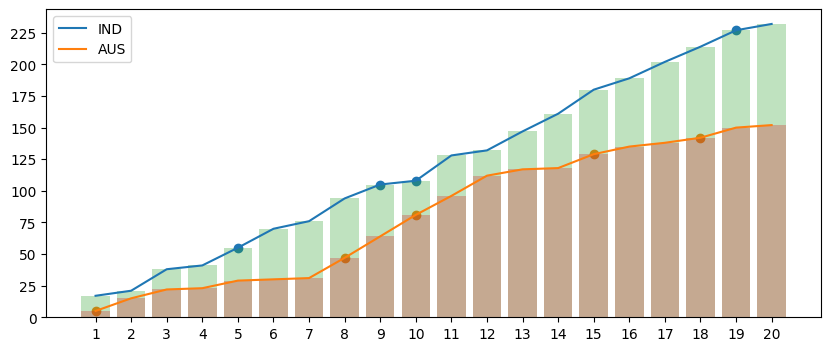

In [104]:
plt.figure(figsize=(10, 4))
plt.plot(range(1, 21), cum_score_ind, label="IND")
plt.plot(range(1, 21), cum_score_aus, label="AUS")
plt.legend()
plt.scatter(ind_wickets[:,0], ind_wickets[:,1])
plt.scatter(aus_wickets[:,0], aus_wickets[:,1])
plt.bar(range(1, 21), cum_score_ind, alpha=0.3)
plt.bar(range(1, 21), cum_score_aus, alpha=0.3)
plt.yticks(range(0, 250, 25))
plt.xticks(range(1, 21))
plt.show()

In [105]:
ind_wickets

array([[  5,  55],
       [  9, 105],
       [ 10, 108],
       [ 19, 227]])

In [106]:
ind_wickets[:,0]

array([ 5,  9, 10, 19])

In [107]:
ind_wickets[:, 1]

array([ 55, 105, 108, 227])

In [108]:
ind_score

0     17
1      4
2     17
3      3
4     14
5     15
6      6
7     18
8     11
9      3
10    20
11     4
12    15
13    14
14    19
15     9
16    13
17    12
18    13
19     5
dtype: int32

In [124]:
data = np.random.normal(165, 8, 40)

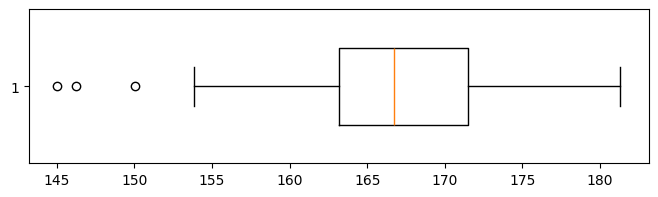

In [138]:
plt.figure(figsize=(8, 2))
plt.boxplot(data, vert=False, widths=0.5)
plt.show()

In [139]:
def Outliers_finder(data):
    sr = pd.Series(data)
    q1 = sr.quantile(0.25)
    q3 = sr.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - (iqr * 1.5)
    upper = q3 + (iqr * 1.5)
    return lower, upper

In [140]:
low, up = Outliers_finder(data)

In [135]:
low, up

(150.6802070540653, 184.02223716082943)

In [142]:
sorted(data)

[144.99126376342323,
 146.23345224211303,
 150.05323069032696,
 153.8306138222333,
 157.7832438866459,
 158.7374702438231,
 160.70640643203623,
 161.3264090244704,
 162.00158166836474,
 162.3093501497917,
 163.47484107553856,
 163.7926473812663,
 164.14026411368636,
 164.820877591084,
 164.84459442405011,
 164.95505521540164,
 165.35298045436866,
 165.76338067089944,
 165.85131741611644,
 166.74872982197385,
 166.75143704071172,
 167.33210238284613,
 167.71989909015605,
 167.86346028442532,
 168.39298904837176,
 169.23680529291312,
 169.8770421116299,
 170.47002434904894,
 170.63416429624073,
 171.19568581106788,
 172.48884604996783,
 173.1695208349007,
 173.3136089946036,
 174.28696605447124,
 174.37829051205682,
 175.19588640202744,
 176.65732055568245,
 178.1778904528406,
 179.61101073255134,
 181.3206381771072]

In [148]:
sorted(data)[29]

171.19568581106788

In [154]:
pd.Series(data).quantile(0.25)

163.18346834410184

In [151]:
(pd.Series(data).quantile(0.75) - pd.Series(data).quantile(0.25))*1.5

12.503261290036548

In [152]:
pd.Series(data).quantile(0.75) + (pd.Series(data).quantile(0.75) - pd.Series(data).quantile(0.25))*1.5

184.02223716082943

In [153]:
pd.Series(data).quantile(0.25) - (pd.Series(data).quantile(0.75) - pd.Series(data).quantile(0.25))*1.5

150.6802070540653